In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

In [314]:
Customer=pd.read_csv('C:/Users/avnis/Case study/Case Study 2_Credit/Customer Acqusition.csv')
Repayment=pd.read_csv('C:/Users/avnis/Case study/Case Study 2_Credit/Repayment.csv')
spend=pd.read_csv('C:/Users/avnis/Case study/Case Study 2_Credit/spend.csv')

In [315]:
Customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [316]:
Repayment.head(2)

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02


In [317]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [318]:
spend.shape

(1500, 5)

In [319]:
Customer.shape

(100, 8)

### 1. In the above dataset

#### a. In case age is less than 18, replace it with mean of age values.

In [320]:
Customer.loc[Customer.Age<18,'Age']=round(Customer['Age'].mean(),ndigits=0)

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [321]:
spend_new=pd.merge(left=Customer,right=spend,how='inner',on='Customer')
spend_new.drop('No',axis=1,inplace=True)

In [322]:
spend_new.loc[spend_new.Amount > spend_new.Limit,'Amount']= 0.5*spend_new.Limit

#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [323]:
repay_new=pd.merge(left=Repayment,right=Customer,how='inner',on='Customer')

In [324]:
repay_new.loc[repay_new.Amount>repay_new.Limit,'Amount']=repay_new.Limit

### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [325]:
print('Number of distinct customers are : ',Customer['Customer'].nunique())

Number of distinct customers are :  100


#### b. How many distinct categories exist?

In [326]:
print('Number of distinct categories are :',Customer['Segment'].value_counts())

Number of distinct categories are : Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64


#### c. What is the average monthly spend by customers?

In [327]:
spend['Month']=spend['Month'].apply(lambda x: pd.to_datetime(x,format="%d-%b-%y"))

In [328]:
spend['Month_Name']=spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%b"))
spend['Year']=spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

In [329]:
print(round(spend.groupby(['Year','Month_Name'])['Amount'].mean(),ndigits=0))

Year  Month_Name
2004  Apr           235272.0
      Feb           221215.0
      Jan           251712.0
      Mar           232146.0
      May           217539.0
      Nov           270486.0
      Sep           310923.0
2005  Apr           252181.0
      Aug           233735.0
      Dec           147503.0
      Feb           229802.0
      Jan           292741.0
      Jul           229117.0
      Jun           262688.0
      May           245697.0
      Nov           286143.0
      Oct           194569.0
      Sep           188666.0
2006  Apr           232469.0
      Aug           240700.0
      Dec           270471.0
      Feb           253858.0
      Jan           282058.0
      Jul           287505.0
      Jun           177252.0
      Mar           247166.0
      May           236163.0
      Nov           182841.0
      Oct           236136.0
      Sep           158520.0
Name: Amount, dtype: float64


#### d. What is the average monthly repayment by customers?

In [330]:
Repayment['Month']=Repayment['Month'].apply(lambda x: pd.to_datetime(x,format="%d-%b-%y"))

In [331]:
Repayment['Month_Name']=Repayment['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%b"))
Repayment['Year']=Repayment['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

In [332]:
print(round(Repayment.groupby(['Year','Month_Name'])['Amount'].mean(),ndigits=0))

Year  Month_Name
2004  Apr           259142.0
      Feb           256703.0
      Jan           243490.0
      Mar           252585.0
      May           226163.0
      Nov           209592.0
      Sep           184488.0
2005  Apr           212689.0
      Aug           264431.0
      Dec           320379.0
      Feb           238829.0
      Jan           240548.0
      Jul           239871.0
      Jun           210200.0
      May           263207.0
      Nov           256695.0
      Oct           219850.0
      Sep           247700.0
2006  Apr           275472.0
      Aug           224144.0
      Dec           252737.0
      Feb           284490.0
      Jan           293475.0
      Jul           257936.0
      Jun           251990.0
      Mar           240851.0
      May           256921.0
      Nov           199399.0
      Oct           260765.0
      Sep           262534.0
Name: Amount, dtype: float64


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [333]:
Cust_Spend_Repay=pd.merge(left=spend_new,right=Repayment,how='inner',on='Customer')

In [334]:
Cust_Spend_Repay.rename(columns={'Month_x':'Month','Amount_x':'Spend_Amount','Amount_y':'Repayed_Amount'},inplace=True)

In [335]:
Profit_2e=Cust_Spend_Repay.groupby(['Year','Month_Name'])[['Spend_Amount','Repayed_Amount']].sum()

In [336]:
Profit_2e['Monthly_Profit']=Profit_2e.Repayed_Amount-Profit_2e.Spend_Amount
Profit_2e['Profit']=Profit_2e.loc[Profit_2e.Monthly_Profit>0,'Monthly_Profit']*0.029

In [337]:
print(Profit_2e)

                 Spend_Amount  Repayed_Amount  Monthly_Profit        Profit
Year Month_Name                                                            
2004 Apr         1.194516e+08    2.285403e+08    1.090887e+08  3.163572e+06
     Feb         7.613922e+07    1.602419e+08    8.410268e+07  2.438978e+06
     Jan         1.088357e+09    1.699210e+09    6.108525e+08  1.771472e+07
     Mar         5.594171e+07    8.974470e+07    3.380298e+07  9.802865e+05
     May         8.800456e+07    1.411594e+08    5.315485e+07  1.541491e+06
     Nov         5.504612e+07    7.860290e+07    2.355678e+07  6.831466e+05
     Sep         5.144278e+07    8.016122e+07    2.871844e+07  8.328349e+05
2005 Apr         9.366405e+07    1.747894e+08    8.112539e+07  2.352636e+06
     Aug         1.361400e+08    2.477449e+08    1.116049e+08  3.236542e+06
     Dec         4.348638e+07    9.944533e+07    5.595895e+07  1.622810e+06
     Feb         5.890557e+08    9.416163e+08    3.525606e+08  1.022426e+07
     Jan    

#### f. What are the top 5 product types?

In [338]:
Top_5=spend['Type'].value_counts().head(5)
print('Top 5 product types are : ',Top_5)

Top 5 product types are :  PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64


#### g. Which city is having maximum spend?

In [339]:
Max_Spend_city=spend_new.groupby('City')['Amount'].sum().sort_values(ascending=False).head(1)

In [340]:
print('City that has maximum sppend : ',Max_Spend_city)

City that has maximum sppend :  City
COCHIN    45963513.5
Name: Amount, dtype: float64


#### h. Which age group is spending more money?

In [341]:
spend_new

,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [342]:
spend_new['Age_Group']=pd.cut(spend_new.Age,bins=range(18,89,10),labels=["18-28","28-38", "38-48" ,"48-58" ,"58-68","68-78",
                                                                         "78-88"])                                                    

In [343]:
highest_spend=spend_new.groupby('Age_Group')['Amount'].sum().reset_index()
highest_spend=highest_spend.sort_values('Amount',ascending=False).head(1)
print('Age group with maximum spend is : ',highest_spend)

Age group with maximum spend is :    Age_Group       Amount
2     38-48  52350765.92


#### i. Who are the top 10 customers in terms of repayment?


In [344]:
Top_10_repayers=repay_new.groupby('Customer')[['Amount']].sum()
Top_10_repayers=Top_10_repayers.sort_values('Amount',ascending=False).head(10)
print('Top 10 Repayers are : ',Top_10_repayers)

Top 10 Repayers are :                 Amount
Customer             
A61       10539142.91
A60        9876290.74
A13        9572000.66
A43        8489871.46
A45        8448334.87
A12        8334760.16
A14        7943268.63
A44        7744730.12
A39        7622483.30
A42        7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [345]:
spend_new['Month']=pd.to_datetime(spend_new["Month"])

In [346]:
spend_new['Year']=spend_new['Month'].apply(lambda x: pd.Timestamp.strftime(x,format='%Y'))

In [347]:
product_year=pd.pivot_table(data=spend_new,index=['City','Year'],columns='Product',
                         values='Amount')

In [348]:
product_year

Product                   Gold       Platimum        Silver
City       Year                                            
BANGALORE  2004  258052.181667   38370.079310  53827.190833
           2005  222282.120517   29428.547419  46145.130000
           2006  240612.221800   26378.125769  52425.220000
BOMBAY     2004  291160.563750   35890.597600  48371.730000
           2005  230333.802051   32354.770000  46271.685455
           2006  203003.700256   31359.032581  84064.138462
CALCUTTA   2004  219915.911176   88595.230435  50000.600000
           2005  257583.895000  123186.008611  55018.382500
           2006  253807.562955   87551.381951  77197.094667
CHENNAI    2004  176603.083333  186086.967368  56411.372000
           2005  311745.465000  157936.135000  47148.061250
           2006  245844.420000  167497.446667  50001.357143
COCHIN     2004  215172.063235  106872.002187  50889.351250
           2005  263274.196304  112748.220682  50174.567692
           2006  233314.275111   98411.845800  70555.048333
DELHI      2004  215884.230769   47252.148333  48010.768750
           2005  178622.297273   54906.428889  55664.655455
           2006  268827.574545   58929.573333  50288.233529
PATNA      2004  296081.128571  371023.200000  47292.756250
           2005  271051.314167  360403.883750  47504.709500
           2006  206925.608182  179448.235714  50000.357143
TRIVANDRUM 2004  241510.284000  144111.778000  41933.496000
           2005  177196.550000  120048.110000  44985.498333
           2006  273571.087000  119300.208333  50532.920000

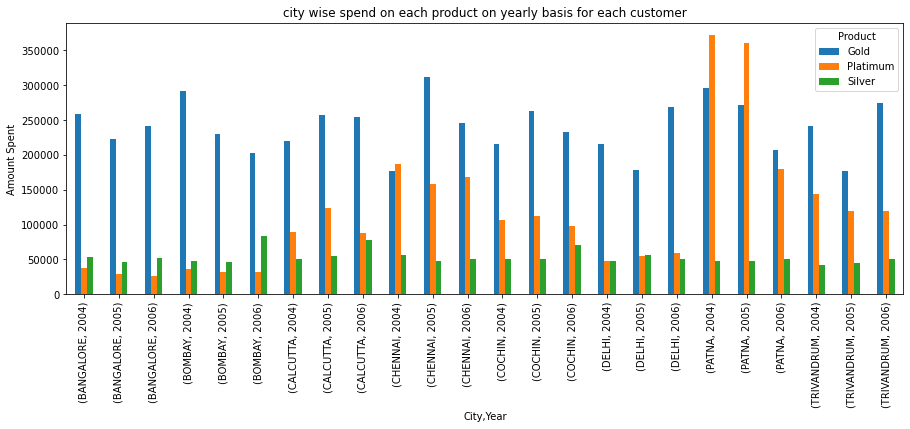

In [349]:
product_year.plot(kind='bar',figsize=(15,5))
plt.ylabel('Amount Spent')
plt.title("city wise spend on each product on yearly basis for each customer")
plt.show()

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

In [372]:
spend_new['Month']=pd.to_datetime(spend_new.Month)
spend_new['Month_Name']=spend_new.Month.apply(lambda x:pd.Timestamp.strftime(x,format='%B'))

In [373]:
monthly_spend=pd.pivot_table(data=spend_new,index='Month_Name',columns='City',values='Amount',aggfunc='sum')

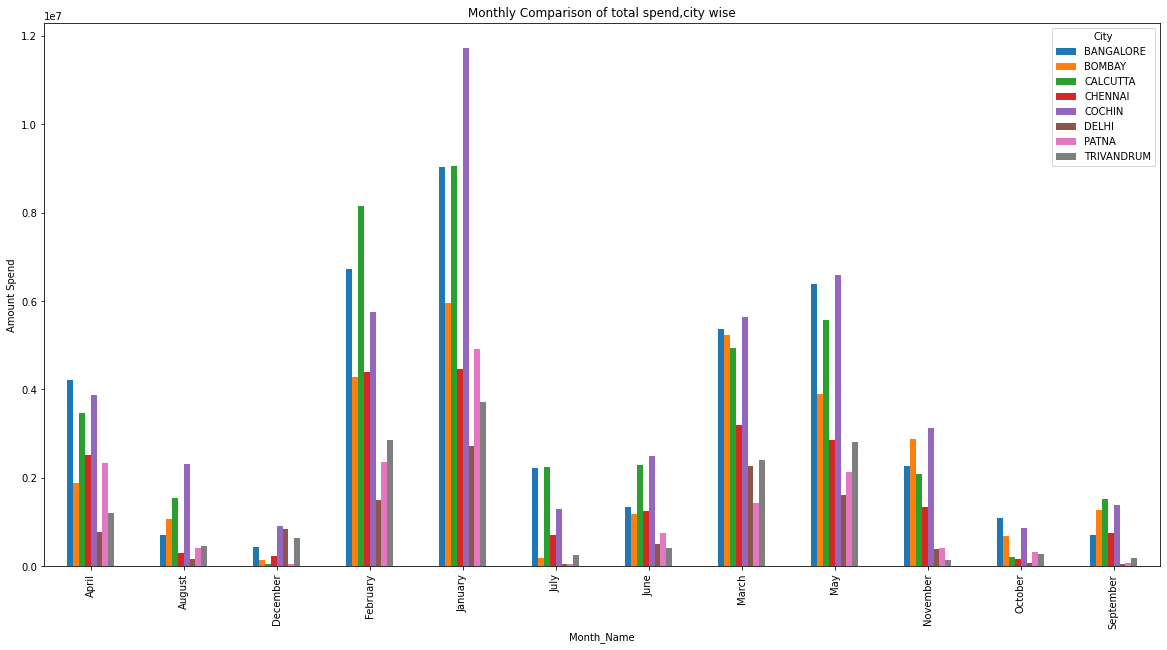

In [374]:
monthly_spend.plot(kind='bar',figsize=(20,10))
plt.ylabel('Amount Spend')
plt.title("Monthly Comparison of total spend,city wise")
plt.show()

####  b. Comparison of yearly spend on air tickets


In [375]:
Spend_Air_Ticket=spend_new.loc[spend_new.Type=='AIR TICKET']

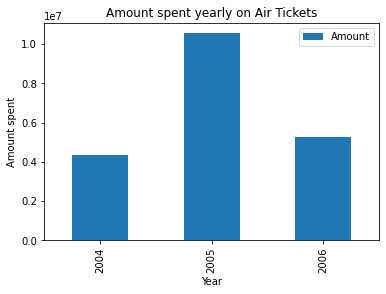

In [376]:
Spend_Air_Ticket.groupby('Year')[['Amount']].sum().plot(kind='bar')
plt.ylabel('Amount spent')
plt.title('Amount spent yearly on Air Tickets')
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend

In [377]:
monthly_product=spend_new.sort_values('Month_Name',ascending=True)

In [378]:
monthly_product=pd.pivot_table(data=spend_new,index='Product',columns='Month_Name',
                               values='Amount',aggfunc='sum')

<AxesSubplot:xlabel='Product'>

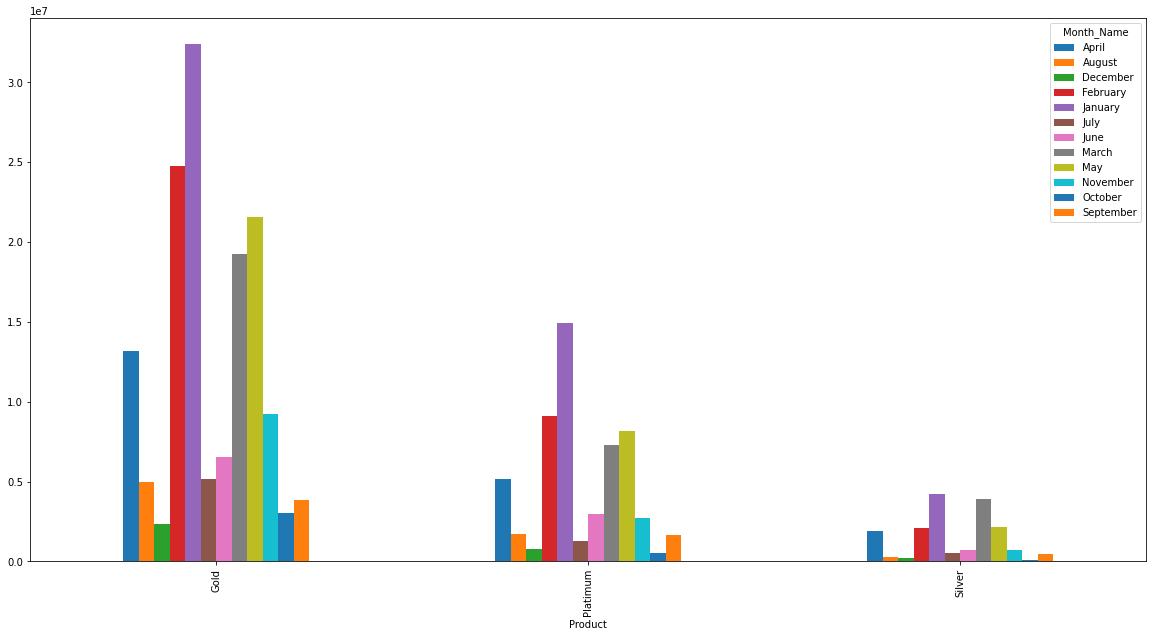

In [379]:
monthly_product.plot(kind='bar',figsize=(20,10))

#### Product sales are higher in months of
##### January
#### February
#### March
#### April
#### May

#### 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [308]:
repay_new['Month']=pd.to_datetime(repay_new.Month)
repay_new['Year']=repay_new.Month.apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))
repay_new['Month_Name']=repay_new.Month.apply(lambda x:pd.Timestamp.strftime(x,format='%B'))

In [309]:
def top_10(product,timeperiod):
    if product.title()=='Gold' and timeperiod.title()=='Monthly':
        top10 = repay_new.loc[repay_new.Product=='Gold'].pivot_table(index=['Product','City','Customer'],
                                                                      columns='Month_Name',
                                                                     aggfunc='sum',values='Amount')
    elif  product.title()=='Gold' and timeperiod.title()=='Yearly':
        top10 = repay_new.loc[repay_new.Product=='Gold'].pivot_table(index=['Product','City','Customer'],
                                                                      columns='Year',
                                                                      aggfunc='sum',values='Amount')
    elif  product.title()=='Silver' and timeperiod.title()=='Monthly':
        top10 = repay_new.loc[repay_new.Product=='Silver'].pivot_table(index=['Product','City','Customer'],
                                                                      columns='Month_Name',
                                                                      aggfunc='sum',values='Amount')
    elif  product.title()=='Silver' and timeperiod.title()=='Yearly':
        top10 = repay_new.loc[repay_new.Product=='Silver'].pivot_table(index=['Product','City','Customer'],
                                                                      columns='Year',
                                                                      aggfunc='sum',values='Amount')
    elif  product.title()=='Platimum' and timeperiod.title()=='Monthly':
        top10 = repay_new.loc[repay_new.Product=='Platimum'].pivot_table(index=['Product','City','Customer'],
                                                                      columns='Month_Name',
                                                                      aggfunc='sum',values='Amount')
    elif  product.title()=='Platimum' and timeperiod.title()=='Yearly':
        top10 = repay_new.loc[repay_new.Product=='Platimum'].pivot_table(index=['Product','City','Customer'],
                                                                      columns='Year',
                                                                      aggfunc='sum',values='Amount')
    return top10

#### For eg.

In [312]:
top_10('Silver','Monthly')

Month_Name                       April     August   December   February  \
Product City       Customer                                               
Silver  BANGALORE  A18       100000.00  100000.00        NaN   38296.41   
                   A23       405083.59  100001.00        NaN  472921.32   
                   A59        16652.72        NaN        NaN  200006.00   
                   A72             NaN        NaN        NaN  100000.00   
                   A76             NaN        NaN        NaN  265619.05   
                   A77             NaN        NaN        NaN    3159.62   
        BOMBAY     A22       392140.92  100000.00        NaN  349814.89   
                   A75             NaN        NaN        NaN  100003.00   
                   A80             NaN        NaN        NaN        NaN   
        CALCUTTA   A2        200000.00  100000.00        NaN  300000.00   
                   A58       200004.00        NaN        NaN  191585.97   
                   A73             NaN        NaN        NaN  100001.00   
                   A78             NaN        NaN        NaN        NaN   
                   A87             NaN        NaN        NaN        NaN   
        CHENNAI    A85             NaN        NaN        NaN        NaN   
                   A9         43323.90        NaN        NaN  266926.41   
                   A96             NaN        NaN        NaN        NaN   
        COCHIN     A100            NaN        NaN        NaN        NaN   
                   A25       300009.00    1168.46        NaN  236157.25   
                   A7              NaN        NaN  100001.00  100001.00   
                   A74             NaN        NaN        NaN  100002.00   
                   A79             NaN        NaN        NaN        NaN   
        DELHI      A24       222060.59  100002.00  100002.00  286593.13   
                   A6              NaN        NaN   27398.18  100000.00   
        PATNA      A46       327793.48        NaN        NaN  544231.79   
                   A8        100002.00        NaN        NaN  300006.00   
                   A84             NaN        NaN        NaN        NaN   
        TRIVANDRUM A57       177378.57        NaN  100001.00  200002.00   
                   A68             NaN        NaN        NaN        NaN   
                   A86             NaN        NaN        NaN        NaN   

Month_Name                     January      July       June      March  \
Product City       Customer                                              
Silver  BANGALORE  A18       391592.71       NaN  200000.00  600000.00   
                   A23       459884.12  100001.0        NaN  100001.00   
                   A59       476551.50  100003.0  110585.36  400012.00   
                   A72             NaN       NaN        NaN        NaN   
                   A76             NaN       NaN        NaN        NaN   
                   A77             NaN       NaN        NaN        NaN   
        BOMBAY     A22       900000.00  100000.0  100000.00  253130.91   
                   A75             NaN       NaN        NaN        NaN   
                   A80             NaN       NaN        NaN  481205.64   
        CALCUTTA   A2        200000.00       NaN        NaN        NaN   
                   A58       333811.62       NaN  100002.00  408754.94   
                   A73             NaN       NaN        NaN        NaN   
                   A78             NaN       NaN        NaN   55344.81   
                   A87             NaN       NaN        NaN  100003.00   
        CHENNAI    A85             NaN       NaN        NaN  100001.00   
                   A9        380193.34       NaN        NaN  400012.00   
                   A96       100000.00       NaN        NaN        NaN   
        COCHIN     A100       69551.19       NaN        NaN        NaN   
                   A25       586332.08  100003.0        NaN  300009.00   
                   A7        594009.28       